In [10]:
import sys
sys.path.append('..')
from multibandphotometry import MultiBandPhotometry

In [1]:
from astropy.io import fits
from glob import glob
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import os
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

## Seperate JWST image

In [24]:
path = '/home/lupengjun/OII_emitter/data/image/COSMOS-Web/'
new_path = '/home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/'
bands = ['F115W', 'F150W', 'F277W', 'F444W']
for band in bands:
    with fits.open(glob(path+f'*{band.lower()}*.fits')[0]) as hdu:
        new_hdul = fits.HDUList([fits.PrimaryHDU(data=hdu[f'{band.upper()}-CLEAR', 'SCI'].data, header=hdu[f'{band.upper()}-CLEAR', 'SCI'].header),
                                hdu[f'{band.upper()}-CLEAR', 'WHT']])
        new_hdul.writeto(new_path+f'cutout_NIRCAM_{band}.fits', overwrite=True) 

In [25]:
for band in bands:
    with fits.open(glob(new_path+f'*{band}*.fits')[0]) as hdu:
        hdu.info()

Filename: /home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/cutout_NIRCAM_F115W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  F115W-CLEAR  SCI PrimaryHDU      87   (2400, 2400)   float32   
  1  F115W-CLEAR  WHT ImageHDU        88   (2400, 2400)   float32   
Filename: /home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/cutout_NIRCAM_F150W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  F150W-CLEAR  SCI PrimaryHDU      87   (2400, 2400)   float32   
  1  F150W-CLEAR  WHT ImageHDU        88   (2400, 2400)   float32   
Filename: /home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/cutout_NIRCAM_F277W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  F277W-CLEAR  SCI PrimaryHDU      70   (2400, 2400)   float32   
  1  F277W-CLEAR  WHT ImageHDU        71   (2400, 2400)   float32   
Filename: /home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/cutout_NIRCAM_F444W.fits
No.    Name      Ver    Type      Cards   Di

In [19]:
path = '/home/lupengjun/OII_emitter/data/image/SUBARU/'
bands = ['HSC-G','HSC-I','HSC-R','HSC-Y','HSC-Z','IB0945','NB0387','NB0527','NB0718','NB0816','NB0921','NB0973']
for band in bands:
    with fits.open(glob(path+f'{band}*/calexp-{band}*.fits')[0]) as hdu:
        fname = glob(path+f'{band}*/calexp-{band}*.fits')[0]
        new_fname = fname.split('calexp')[-1]
        new_fname = new_fname.replace(',', '-')
        new_path = '/'.join(fname.split('/')[:-1])
        new_hdul = fits.HDUList([fits.PrimaryHDU(data=hdu[1].data, header=hdu[1].header)])
        new_hdul.writeto(new_path+f'/image{new_fname}', overwrite=True) 

## Load image path and zeroponits

In [11]:
source_position = SkyCoord(150.15949, 2.1914772, frame='icrs', unit=u.deg)
z = 0.924

In [12]:
phot = MultiBandPhotometry(source_position, z,)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2016-06-04T00:47:19.488' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-05-03T03:37:16.477' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-06-29T23:52:46.677' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-05-03T03:02:47.823' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-04-30T03:11:04.794' from MJD-END'. [astropy.wcs.wcs]


In [12]:
for key, value in phot.image_paths.items():
    with open('image_path_for_sex.txt', 'a+') as f:
        f.write(key+'\t'+value+'\n')

In [13]:
image_paths = np.loadtxt('image_path_for_sex.txt', dtype=str, delimiter='\t')

In [14]:
phot.load_zeropoints()
for key, value in phot.zeropoints.items():
    with open('zeropoints_for_sex.txt', 'a+') as f:
        f.write(key+'\t'+value.astype(str)+'\n')

In [15]:
zeropoints = np.loadtxt('zeropoints_for_sex.txt', dtype=str, delimiter='\t')

## Run SExtractor

tuned_params: CATALOG_NAME MAG_ZEROPOINT CHECKIMAGE_NAME

In [16]:
dic_img_path = dict(image_paths)
dic_zp = dict(zeropoints)

In [10]:
for telescope_band in dic_img_path.keys():
    telescope, band = telescope_band.split('_')
    # if telescope == 'SUBARU':
    tmp_img = dic_img_path[telescope_band]
    tmp_zp = dic_zp[telescope_band].astype(float)
    CATALOG_NAME = '/home/lupengjun/OII_emitter/photometry/output/SEcatalogs/'+f'{telescope_band}_SEcat.fits'
    CHECKIMAGE_NAME = '/home/lupengjun/OII_emitter/photometry/output/SEinterim/'+f'{telescope_band}_bkg_SEcheck.fits'
    os.system(f'sex {tmp_img} -c COSMOS.sex -MAG_ZEROPOINT {tmp_zp} -CATALOG_NAME {CATALOG_NAME} -CHECKIMAGE_NAME {CHECKIMAGE_NAME}')


> 
----- SExtractor 2.28.0 started on 2023-10-21 at 19:50:04 with 1 thread

> Setting catalog parameters
> Initializing check-image(s)
> Initializing catalog
> Looking for image-HSC-G-9813-4-4.fits
----- Measuring from: image-HSC-G-9813-4-4.fits
      "Unnamed" / no ext. header / 4200x4200 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up background map at line:  896
> Setting up background map at line:  960
> 

In [17]:
image_paths.shape, len(os.listdir('/home/lupengjun/OII_emitter/photometry/output/SEcatalogs'))

((35, 2), 35)

In [7]:
len(os.listdir('/home/lupengjun/OII_emitter/photometry/output/psfmodels'))

35

## Run PSFEx

write catalogs in a ASCII file for PSFEx

In [20]:
for fname in os.listdir('/home/lupengjun/OII_emitter/photometry/output/SEcatalogs'):
    with open('cat_list_for_PSFEx.txt', 'a+') as f:
        f.write('/home/lupengjun/OII_emitter/photometry/output/SEcatalogs/'+fname+'\n')


In [26]:
with open('/home/lupengjun/OII_emitter/photometry/code/SEx+psfEx/cat_list_for_PSFEx.txt') as f:
    for i, line in enumerate(f.readlines()):
        with open('/home/lupengjun/OII_emitter/photometry/output/PSFinterim/cmd_list_for_PSFEx.txt', 'a+') as f_:
            line = line.split('\n')[0]
            f_.write(f'psfex {line} -c COSMOS.psfex\n')

In [28]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
tb = Table.read('/home/lupengjun/OII_emitter/photometry/output/psfmodels/HST_F814W_SEcat.psf', 'PSF_DATA')
# psf = np.array(tb['PSF_MASK'])

In [4]:
fits.getdata('/home/lupengjun/OII_emitter/photometry/output/psfmodels/SUBARU_NB0718_SEcat.psf', 1)['PSF_MASK'].astype(np.float64)[0][0].shape

(25, 25)

In [2]:
fits.getdata('/home/lupengjun/OII_emitter/photometry/output/psfmodels/SUBARU_NB0718_SEcat.psf', 1)['PSF_MASK'].shape

(1, 1, 25, 25)

In [31]:
psf_ = np.array(tb['PSF_MASK'])

In [32]:
psf = psf_[0][0]

## Plot PSF generated by PSFEx

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


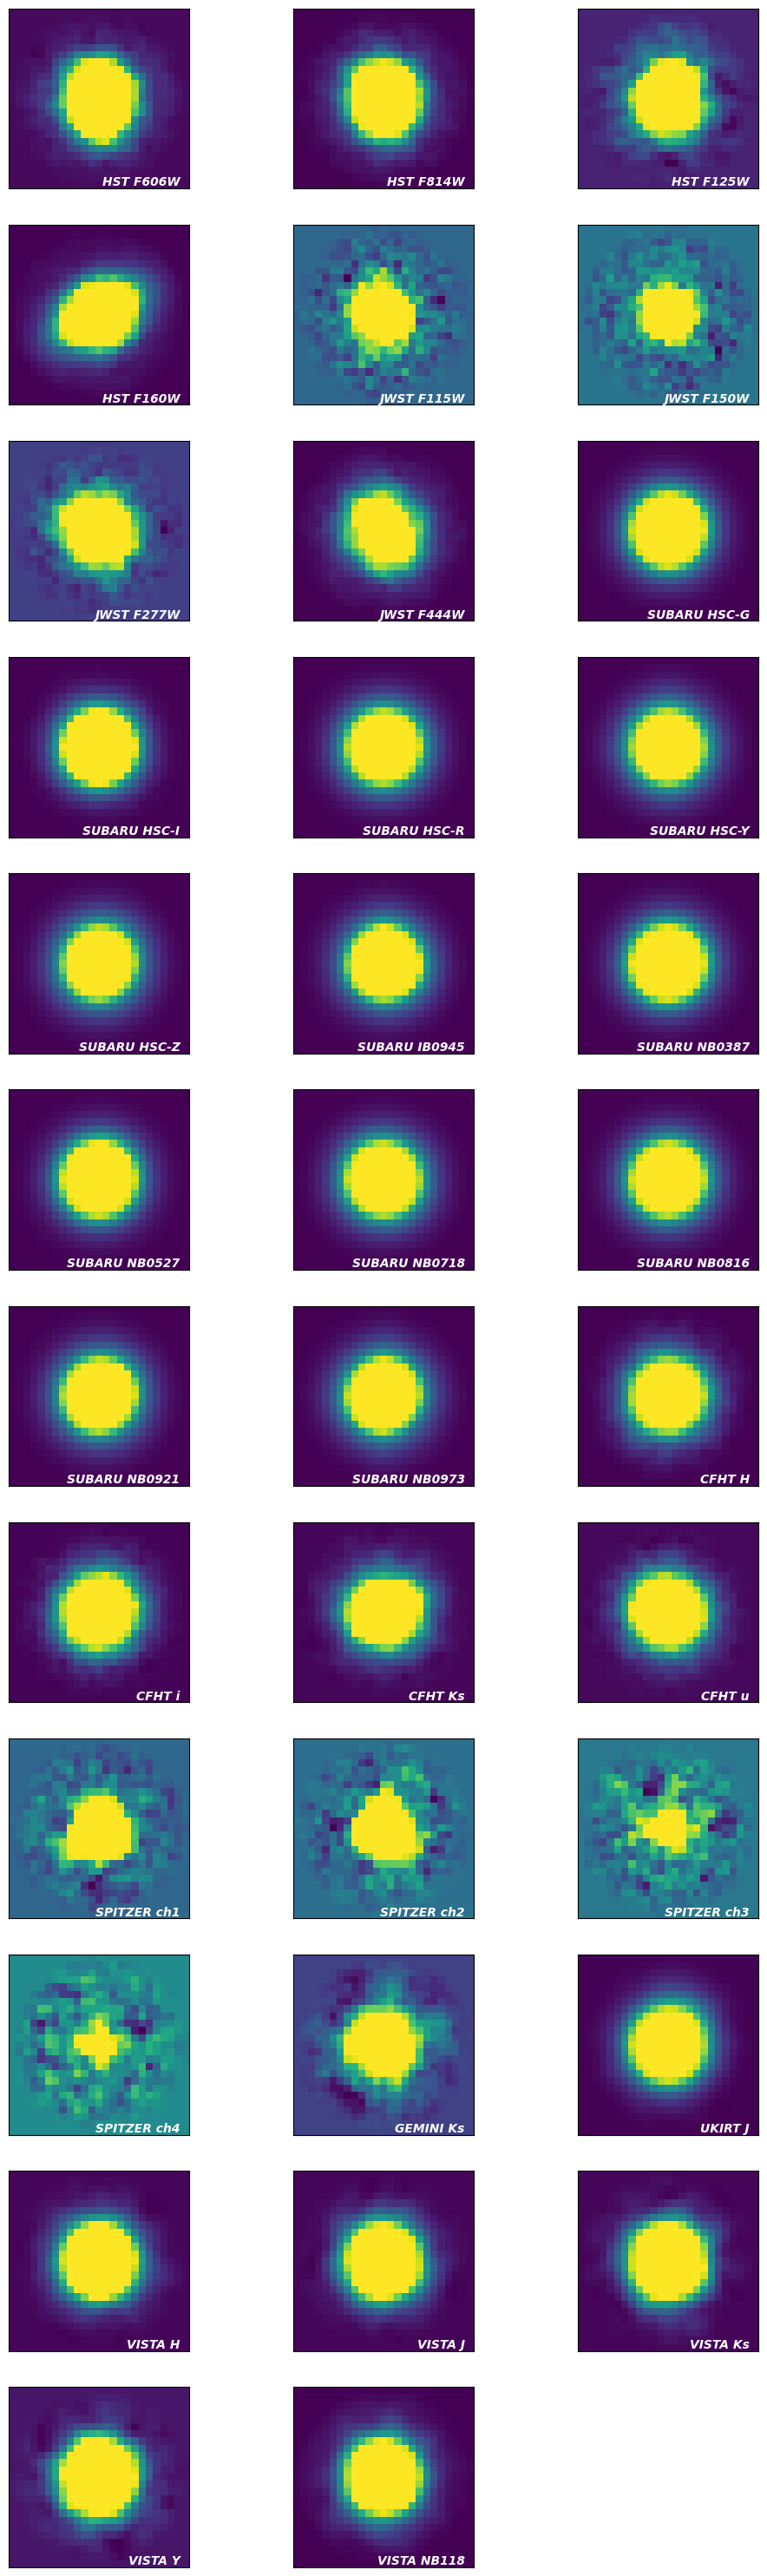

In [14]:
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval
from astropy.visualization import ImageNormalize

fig = plt.figure(figsize=(12, 48))
gs = fig.add_gridspec(15, 3,)
i = -1
for telescope in phot.valid_bands.keys():
    for band in phot.valid_bands[telescope]:
        telescope_band = telescope+'_'+band
        #print(telescope_band)
        with fits.open(glob('/home/lupengjun/OII_emitter/photometry/output/PSFinterim/'+f'snap_{telescope_band}*')[0]) as hdu:
            if telescope == 'JWST':
                psf = hdu[1].data
                wcs = WCS(hdu[1].header)
            else:
                psf = hdu[0].data
                wcs = WCS(hdu[0].header)
        i += 1
        ax =      fig.add_subplot(gs[i//3, i%3])
        norm = ImageNormalize(psf, interval=ZScaleInterval())
        ax.imshow(psf, norm=norm, origin='lower')
        #ax.imshow(psf, origin='lower')
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()    
        ax.text(0.95*xmax, 0.95*ymin, ' '.join(telescope_band.split('_')), color='white', ha='right', va='bottom', fontstyle='italic', fontweight='bold')
        #calculate xyscale in arcsec
        xscale = (xmax-xmin)*wcs.proj_plane_pixel_scales()[0].to(u.arcsec).value
        yscale = (ymax-ymin)*wcs.proj_plane_pixel_scales()[1].to(u.arcsec).value
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.set_xlabel('%.1f arcsec'%xscale)
        # ax.set_ylabel('%.1f arcsec'%yscale)
plt.show()


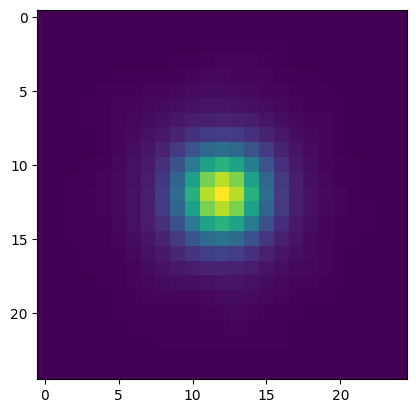

In [18]:
with fits.open(glob('/home/lupengjun/OII_emitter/photometry/output/PSFinterim/'+f'snap_{telescope_band}*')[0]) as hdu:
    # plt.subplot(1,3,1)
    # plt.imshow(hdu[1].data-hdu[2].data)
    # plt.subplot(1,3,2)
    # plt.imshow(hdu[1].data)
    # plt.subplot(1,3,3)
    # plt.imshow(hdu[2].data)
    # print(np.any(hdu[2].data))
    plt.imshow(hdu[0].data)

In [27]:
for webb_band in phot.valid_bands['JWST']:
    print(webb_band)
    print('PSF pixel scale:', fits.getheader(f'/home/lupengjun/find_quiescent/WebbPSF/psf/NIRCam_{webb_band}_5arcsec.fits', 0)['PIXELSCL'])
    wcs = WCS(fits.getheader(f'/home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/cutout_NIRCAM_{webb_band}.fits', 0))
    print('Image pixel scale:', wcs.proj_plane_pixel_scales()[0].to(u.arcsec).value)

F115W
PSF pixel scale: 0.007774999999999999
Image pixel scale: 0.049999999999996804
F150W
PSF pixel scale: 0.007774999999999999
Image pixel scale: 0.049999999999996804
F277W
PSF pixel scale: 0.01575
Image pixel scale: 0.049999999999996804
F444W
PSF pixel scale: 0.01575
Image pixel scale: 0.049999999999996804


In [22]:
fits.getheader('/home/lupengjun/OII_emitter/data/image/COSMOS-Web_sep/cutout_NIRCAM_F444W.fits', 0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2400                                                  
NAXIS2  =                 2400                                                  
EXTEND  =                    T                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =             -16084.5 / Pixel coordinate of reference point            
CRPIX2  =             -84578.5 / Pixel coordinate of reference point            
CD1_1   = -1.3888888888888E-05 / Coordinate transformation matrix element       
CD2_2   =  1.3888888888889E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1

In [7]:
(1641.1*u.Mpc * 2*u.arcsec.to(u.rad)).decompose().to(u.kpc)

<Quantity 15.91255464 kpc>

In [6]:
2*u.arcsec.to(u.rad)

9.69627362219072e-06